![Colegio Bourbaki](./Images/Bourbaki.png)

## Auto-encoders y Missing Values

### ESG indicators missing value estimation
by Pladifes (https://challengedata.ens.fr/challenges/87)

**Contexto del reto**

A medida que aumenta el número de inversores y de personas dispuestas a comprometerse con las preocupaciones medioambientales y sociales, las características extrafinancieras de las empresas (también denominadas ESG por Environment, Social and Governance) cobran cada vez más importancia.

Impactfull es una empresa que ofrece asesoramiento sobre finanzas sostenibles y datos extrafinancieros basados en datos brutos verificados procedentes de las empresas. Sus datos se componen de más de 30 indicadores (dentro de las categorías medioambiental, social y de gobernanza) y se extraen de los informes de sostenibilidad.

Pladifes es un proyecto de investigación alojado en el Institut Louis Bachelier, una asociación sin ánimo de lucro que promueve la investigación en economía y finanzas. Se trata de un EquipEx+ (código: ANR-21-ESRE-0036), financiado por la ANR y destinado a facilitar el acceso a datos extrafinancieros con fines de investigación.

Este reto es el resultado de una colaboración entre las dos partes mencionadas, como una oportunidad para ambas de ganar visibilidad y permitir a los estudiantes trabajar con (esperemos) interesantes datos financieros adicionales.

El equipo de Pladifes también tiene previsto incluir la mejor propuesta del reto en su base de datos, lo que permitirá a los investigadores utilizarla para proyectos académicos.


**Objetivos del reto**

El objetivo del reto es predecir los valores que faltan para 15 indicadores extrafinancieros corporativos (hasta un 96% de valores perdidos). Estos indicadores están disponibles durante tres años (2018, 2019, 2020) y provienen de divulgaciones de sostenibilidad.

En ambos conjuntos de entrada (X_train y X_test), algunos de los valores perdidos se añaden artificialmente en comparación con los de salida (y_train, y_test). Estos valores adicionales se utilizan para calcular el rendimiento del modelo comparando los valores imputados con los valores ocultos reales. Por lo demás, los archivos de entrada y salida tienen exactamente el mismo número de filas y columnas.

El objetivo es, por tanto, entrenar un modelo de imputación de valores perdidos en los datos de entrenamiento y utilizarlo en los datos de prueba para rellenar los huecos.

**Descripción de los datos**

Los datos de entrada contienen 15 indicadores financieros adicionales sobre 10 000 empresas durante un máximo de tres años (2018, 2019, 2020).

Cada línea está definida por un "ID" único y corresponde a una empresa determinada (definida por "company_id") y a un año determinado (definido por "year"). Los datos se han seleccionado de forma que no haya más de un 96% de valores perdidos para un indicador determinado. Las empresas son anónimas y se dividen en un conjunto de entrenamiento y otro de prueba, de modo que una empresa determinada sólo puede encontrarse en el conjunto de entrenamiento o en el de prueba.

La primera línea del archivo de entrada contiene la cabecera, y las columnas están separadas por comas. El tamaño total es inferior a 10Mo.

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores perdidos adicionales.

El número de valores enmascarados por columna es de al menos 100, como máximo el 15% de los valores no ausentes disponibles (tanto para X_train como para X_test).

| Column Name                           | Description                                               | Missing Value (%) |
| ------------------------------------- | --------------------------------------------------------- | ----------------- |
| anonimized_id                         | The index (unique)                                       | 0%                |
| company_id                            | The company id (unique)                                   | 0%                |
| year                                  | The year (2018, 2019, 2020)                               | 0%                |
| region                                | The region (5 options)                                    | 0%                |
| headquarters_country                  | The headquarter country (99 options)                     | 0%                |
| industry                              | The primary industry sector (153 options)                | 0%                |
| market cap                            | The "size of the company" (stock value x number of stocks, in $) | 0%                |
| employees                             | The number of employees of the company                    | 16%               |
| revenue                               | The annual revenue of the company (in $)                 | 2%                |
| scope_1                               | The scope 1 (direct) GHG emission of the company (in T/CO2e) | 66%               |
| scope_2                               | The scope 2 (indirect, owned) GHG emission of the company (in T/CO2e) | 66%               |
| scope_3                               | The scope 3 (indirect, not owned) GHG emission of the company (in T/CO2e) | 69%               |
| waste_production                      | The annual amount of waste produced (in T)               | 84%               |
| waste_recycling                       | The annual amount of waste recycled (in T)               | 89%               |
| water_consumption                     | The annual amount of water consumed (in T)              | 72%               |
| water_withdrawal                      | The annual amount of water withdrawn (in T)             | 74%               |
| energy_consumption                    | The annual energy consumption (in KWH)                   | 82%               |
| hours_of_training                     | The number of hours of training for all employees for one year (in H) | 87%               |
| gender_pay_gap                        | Mean men's annual earnings above women's annual earnings (in %) | 96%               |
| independant_board_members_percentage  | The percentage of independent members in the board of the company (in %) | 75%               |
| legal_costs_paid for_controversies     | The annual amount of the legal costs paid for controversies (in $) | 59%               |
| ceo_compensation                      | The annual CEO compensation (in $)                       | 92%               |


## Introducción a Missing Values 

La falta de datos es un problema común que aparece en contextos reales y puede comprometer
el rendimiento de la mayoría de los modelos de aprendizaje (Abreu et al., 2014a,b)

En la comunidad se reconocen tres mecanismos de ausencia de datos: (Baraldi and Enders, 2010; Rubin, 1976; Little and Rubin, 2019):

* Missing Completely At Random (MCAR): se produce cuando el mecanismo de la
omisión no está relacionado con ningún valor observado o no observado del conjunto de datos;

* Missing At Random (MAR): se produce cuando la causa de los datos que faltan está relacionada
con los valores observados del conjunto de datos;

* Missing Not At Random (MNAR): se produce cuando la probabilidad de que falte un valor
falta está relacionada con ese mismo valor y/o con otros datos desconocidos

![Missing Values](./Images/MissingValues.png)

## Librerias

In [1]:
# Data Analysis
import numpy as np
import pandas as pd
import missingno as msno  # Handling missing values viz

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Preproccesing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error

# Principal Component Analysis
from statsmodels.multivariate.pca import PCA

# Autoencoder Architecture
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split

# Utils
import os
import sys
from scipy.stats import zscore
from torchsummary import summary  # Display model summary
from tqdm.notebook import tqdm  # Display progress bar

## Configuraciones

### Valores Semilla

In [2]:
# Set seed for random generators
seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
np.random.seed(seed)

### GPU Management

In [3]:
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
!set 'PYTORCH_CUDA_ALLOC_CONF=max_split_size_mb:2'
torch.cuda.empty_cache()
torch.backends.cudnn.enabled = True
torch.backends.cudnn.benchmark = False

In [4]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [5]:
device

'cuda:0'

In [6]:
print("__Python VERSION:", sys.version)
print("__pyTorch VERSION:", torch.__version__, end="\n\n")

if torch.cuda.is_available():
    print("__CUDA VERSION")
    ! nvcc --version
    print("__CUDNN VERSION:", torch.backends.cudnn.version())
    print("__Number CUDA Devices:", torch.cuda.device_count())
    print("__Devices:")
    print("Active CUDA Device: GPU", torch.cuda.current_device())
    print("Available devices ", torch.cuda.device_count())
    print("Current cuda device ", torch.cuda.current_device())
    ! nvidia-smi

__Python VERSION: 3.12.3 (main, Sep  4 2024, 12:08:24) [GCC 13.2.0]
__pyTorch VERSION: 2.5.0+cu124

__CUDA VERSION
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Wed_Aug_14_10:10:22_PDT_2024
Cuda compilation tools, release 12.6, V12.6.68
Build cuda_12.6.r12.6/compiler.34714021_0
__CUDNN VERSION: 90100
__Number CUDA Devices: 1
__Devices:
Active CUDA Device: GPU 0
Available devices  1
Current cuda device  0
Sun Oct 20 01:08:09 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |             

### Display

In [7]:
# Set the display format to avoid exponential notation
pd.set_option("display.float_format", lambda x: "%.3f" % x)

### Funciones de ayuda

In [8]:
def correlation(dataframe, plot=True, matrix=False):
    """Devuelve la matriz de correlación de un dataframe,
    si plot=True, muestra un mapa de calor de la matriz de correlación,
    si matrix=True, devuelve la matriz de correlación"""
    corr = dataframe.corr(method="spearman")

    if plot:
        fig, ax = plt.subplots(figsize=(25, 20))
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
        cmap = sns.color_palette("coolwarm", as_cmap=True)
        sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", square=True)

    if matrix:
        return corr

In [9]:
def normalized_mrse(y_true, y_pred):
    """Calcula el error cuadrático medio normalizado"""
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    range_y = np.max(y_true) - np.min(y_true)
    nrmse = rmse / range_y
    return nrmse

## Importación de datos

Los archivos de salida (y_train, y_test) serían los datos originales y los de entrada (X_train, X_test) los mismos pero con valores faltantes adicionales.

El archivo y_train actua de alguna manera de etiqueta frente al archivo X_train, ya que este tiene valores faltantes adicionales.

Usaremos el archivo y_train sin valores faltantes demás para entrenar el modelo, mientras que el archivo x_train hará de validador. X_test sera el testing, mientras que y_test será la respuesta al challenge.

In [10]:
df_x_train = pd.read_csv("./Data/x_train.csv")
df_y_train = pd.read_csv("./Data/y_train.csv")

## Análisis Exploratorio

In [11]:
df_y_train.head()

,Unnamed: 0,anonimized_id,company_id,year,region,headquarters_country,industry,market_cap,employees,revenue,...,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
0,0,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2020,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2020,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,147000.000,241518.300,...,45705.800,28939.820,4875000.000,4875000.000,3019170.000,NaN,NaN,0.009,0.000,14769259.000
1,1,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2019,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2019,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,137000.000,228901.090,...,58395.940,32806.410,4890151.520,4992424.240,2889680.000,NaN,NaN,0.009,1.850,11555466.000
2,2,c67ee84d-5cf4-4cd0-85b9-027ad082748f_2018,c67ee84d-5cf4-4cd0-85b9-027ad082748f,2018,United States and Canada,United States,"Technology Hardware, Storage and Peripherals",2251351.650,132000.000,233670.480,...,52849.837,30104.594,4765151.515,4924242.424,2676460.000,NaN,NaN,0.009,NaN,15682219.000
3,3,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2020,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2020,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,66800.000,202736.820,...,NaN,NaN,36150000.000,36150000.000,149564000.012,NaN,NaN,0.455,0.000,NaN
4,4,9ea5e71e-33ac-4916-9c58-50ce9fa54abe_2019,9ea5e71e-33ac-4916-9c58-50ce9fa54abe,2019,Africa / Middle East,Saudi Arabia,Integrated Oil and Gas,2105957.100,79000.000,290853.120,...,NaN,NaN,NaN,NaN,121216000.010,NaN,NaN,0.455,NaN,NaN


In [12]:
df_y_train = df_y_train.drop(columns=["Unnamed: 0"])

In [13]:
df_y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   anonimized_id                         15000 non-null  object 
 1   company_id                            15000 non-null  object 
 2   year                                  15000 non-null  int64  
 3   region                                15000 non-null  object 
 4   headquarters_country                  15000 non-null  object 
 5   industry                              15000 non-null  object 
 6   market_cap                            15000 non-null  float64
 7   employees                             12487 non-null  float64
 8   revenue                               14703 non-null  float64
 9   scope_1                               5029 non-null   float64
 10  scope_2                               5011 non-null   float64
 11  scope_3        

In [14]:
print("Numero de valores NaN por columna:")
df_y_train.isna().sum()

Numero de valores NaN por columna:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                2513
revenue                                   297
scope_1                                  9971
scope_2                                  9989
scope_3                                 10412
waste_production                        12744
waste_recycling                         13459
water_consumption                       10764
water_withdrawal                        11040
energy_consumption                      12330
hours_of_training                       13130
gender_pay_gap                          14357
independent_board_members_percentage    11266
legal_costs_paid_for_controversies       8892
ceo_compensation                  

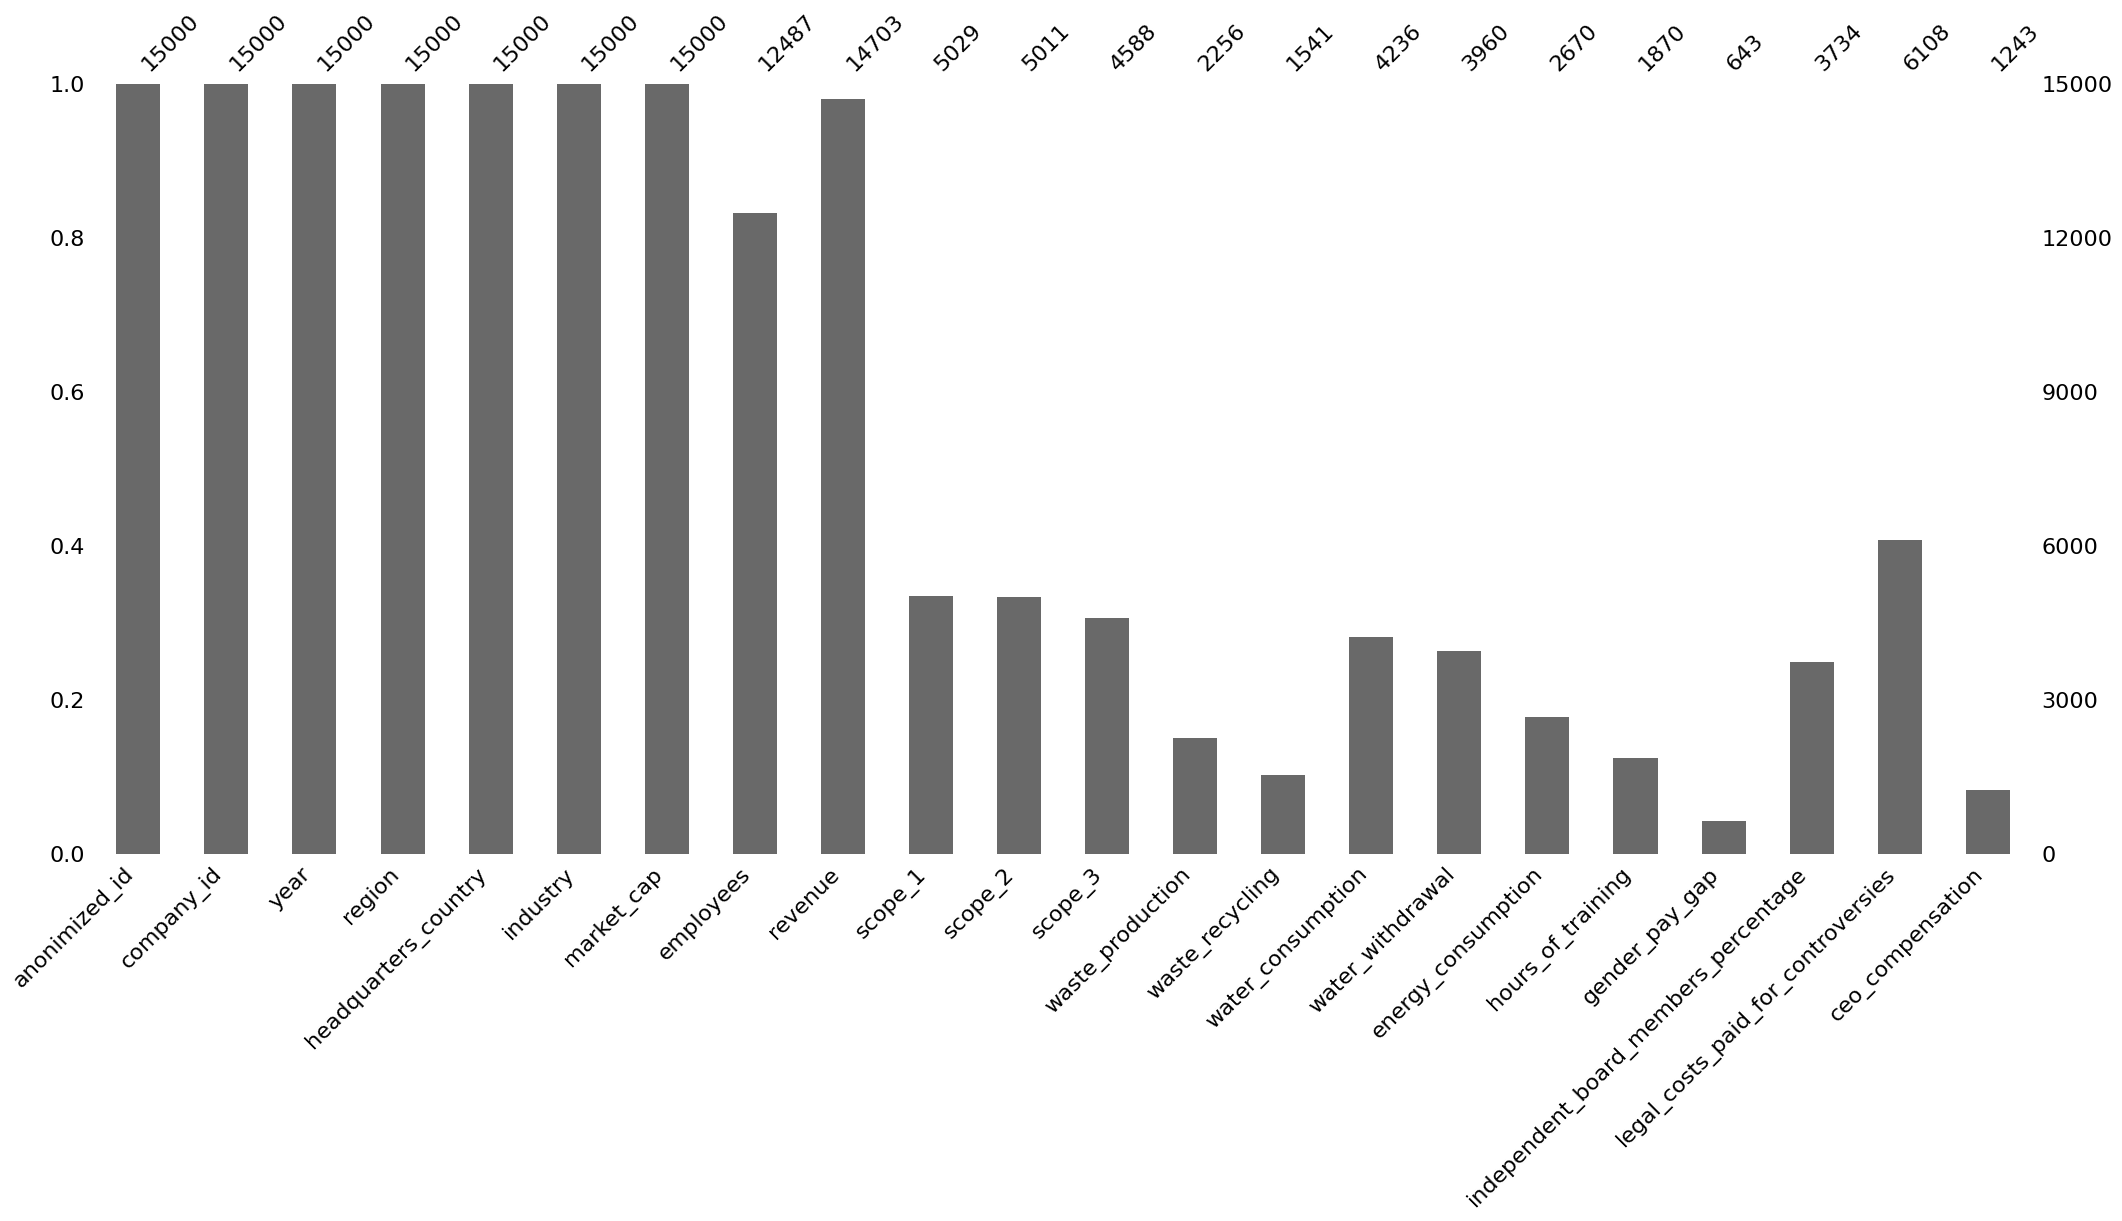

In [15]:
msno.bar(df_y_train)
plt.show()

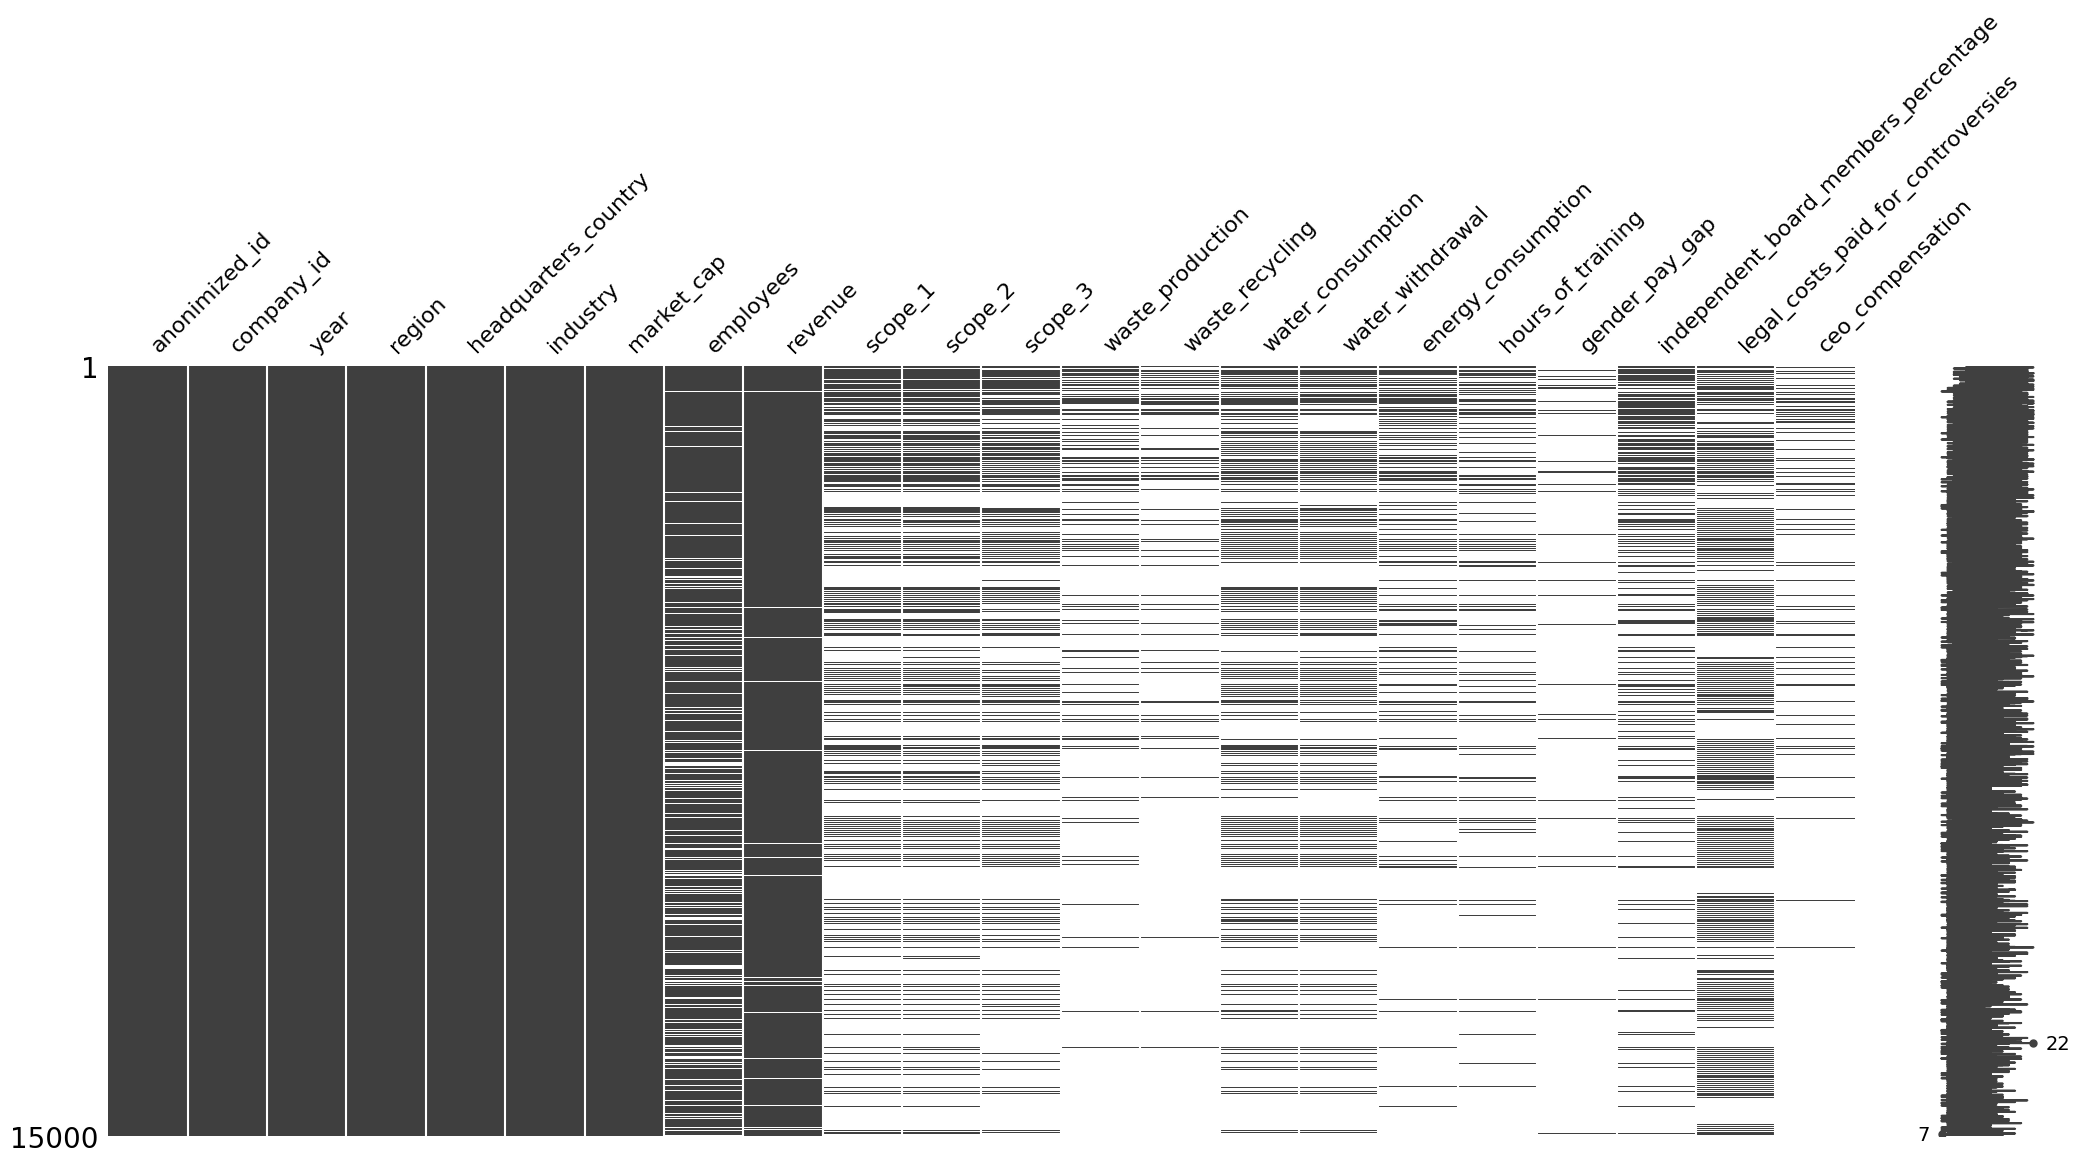

In [16]:
msno.matrix(df_y_train)
plt.show()

In [17]:
print(
    f"El número total de valores NaN en el archivo y_train es {df_y_train.isna().sum().sum()}"
)

El número total de valores NaN en el archivo y_train es 154921


In [18]:
df_y_train.isna().sum().sum()

np.int64(154921)

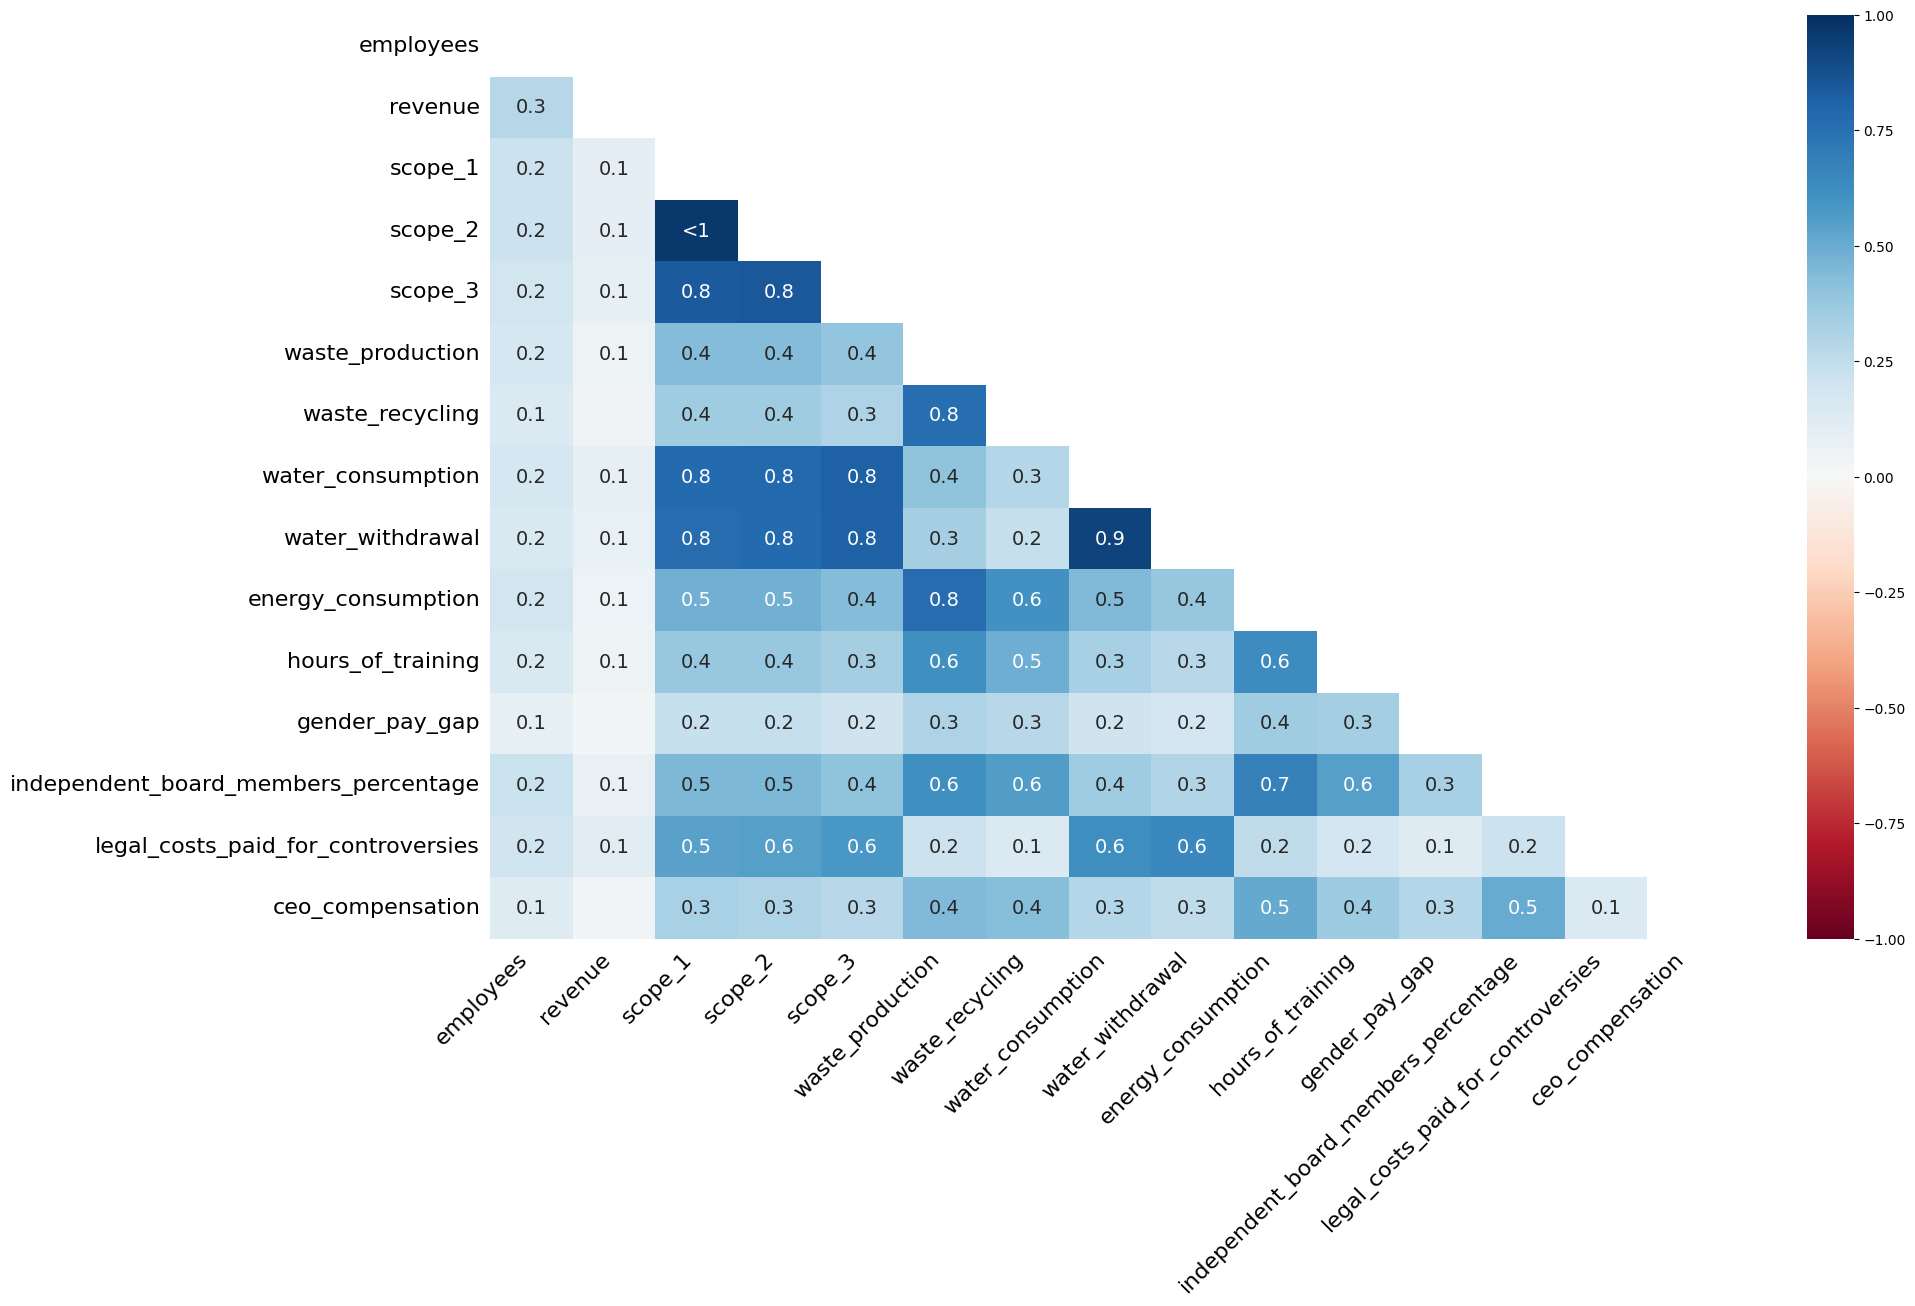

In [19]:
msno.heatmap(df_y_train)
plt.show()

La correlación de nulidad oscila entre -1 (si una variable aparece la otra definitivamente no) y 0 (las variables que aparecen o no aparecen no tienen ningún efecto entre sí) y 1 (si una variable aparece la otra definitivamente también).

Las variables que están siempre llenas o siempre vacías no tienen una correlación significativa, por lo que se eliminan silenciosamente de la visualización.

Las entradas marcadas con <1 o >-1 tienen una correlación que está cerca de ser exactamente negativa o positiva, pero que todavía no es perfecta. Esto apunta a un pequeño número de registros erróneos en el conjunto de datos. Podemos chequear, entonces, qué casos requerirán una atención especial.

El mapa de calor funciona muy bien para detectar relaciones de integridad de datos entre pares de variables, pero su poder explicativo es limitado cuando se trata de relaciones más amplias y no es especialmente adecuado para conjuntos de datos extremadamente grandes.

In [20]:
df_x_train = df_x_train.drop(columns=["Unnamed: 0"])

In [21]:
print("Numero de valores NaN por columna del archivo x_train:")
df_x_train.isna().sum()

Numero de valores NaN por columna del archivo x_train:


anonimized_id                               0
company_id                                  0
year                                        0
region                                      0
headquarters_country                        0
industry                                    0
market_cap                                  0
employees                                4386
revenue                                  2502
scope_1                                 10725
scope_2                                 10740
scope_3                                 11100
waste_production                        13082
waste_recycling                         13690
water_consumption                       11399
water_withdrawal                        11634
energy_consumption                      12730
hours_of_training                       13410
gender_pay_gap                          14457
independent_board_members_percentage    11826
legal_costs_paid_for_controversies       9808
ceo_compensation                  

In [22]:
print(
    f"El número total de valores NaN en el archivo x_train es: {df_x_train.isna().sum().sum()}"
)

El número total de valores NaN en el archivo x_train es: 165432


In [23]:
df_x_train.isna().sum().sum()

np.int64(165432)

In [24]:
print(
    f"La diferencia de valores NaN entre el archivo x_train y y_train es: {df_x_train.isna().sum().sum() - df_y_train.isna().sum().sum()}"
)

La diferencia de valores NaN entre el archivo x_train y y_train es: 10511


In [25]:
df_x_train.isna().sum().sum() - df_y_train.isna().sum().sum()

np.int64(10511)

### Estadística Descriptiva

In [26]:
columns = df_y_train.columns[7:]  # Columnas continuas (float64) de interés

In [27]:
columns

Index(['employees', 'revenue', 'scope_1', 'scope_2', 'scope_3',
       'waste_production', 'waste_recycling', 'water_consumption',
       'water_withdrawal', 'energy_consumption', 'hours_of_training',
       'gender_pay_gap', 'independent_board_members_percentage',
       'legal_costs_paid_for_controversies', 'ceo_compensation'],
      dtype='object')

In [28]:
columns

Index(['employees', 'revenue', 'scope_1', 'scope_2', 'scope_3',
       'waste_production', 'waste_recycling', 'water_consumption',
       'water_withdrawal', 'energy_consumption', 'hours_of_training',
       'gender_pay_gap', 'independent_board_members_percentage',
       'legal_costs_paid_for_controversies', 'ceo_compensation'],
      dtype='object')

In [29]:
df_y_train[columns].describe()

,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
count,12487.000,14703.000,5029.000,5011.000,4588.000,2256.000,1541.000,4236.000,3960.000,2670.000,1870.000,643.000,3734.000,6108.000,1243.000
mean,16160.774,4452.430,1628980.355,529082.105,15071623.843,7685791.646,193786.945,46437053.839,168140929.623,51680542.615,1061093.561,2.869,0.599,39.341,7284989.399
std,42612.668,15257.250,12571119.883,8165525.947,359203106.527,93885553.773,1187292.334,1246839286.343,2481247595.667,1612081181.154,5506664.838,6.587,0.264,311.673,10651592.646
min,1.000,-8257.940,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.003,0.000,-8.100,0.000,0.000,9768.000
25%,1500.000,300.665,1020.000,2935.560,2752.750,4089.000,2059.000,111671.688,220641.408,120908.472,14607.750,0.798,0.400,0.000,1665600.000
50%,4368.000,890.190,11817.000,23561.000,27260.000,28243.950,16647.000,604572.520,1174083.170,634069.000,150213.000,0.953,0.615,0.000,3806000.000
75%,12907.000,2960.310,118300.000,121323.500,308928.250,174086.000,94000.000,3787000.000,6663092.213,3453722.500,668202.000,1.000,0.833,4.322,9771571.500
max,969696.000,410650.320,339422881.805,339422881.805,16790000000.000,2461882000.000,24874600.000,57943900000.000,72000000000.000,81670056270.000,148295008.000,40.000,1.000,14830.200,211131206.000


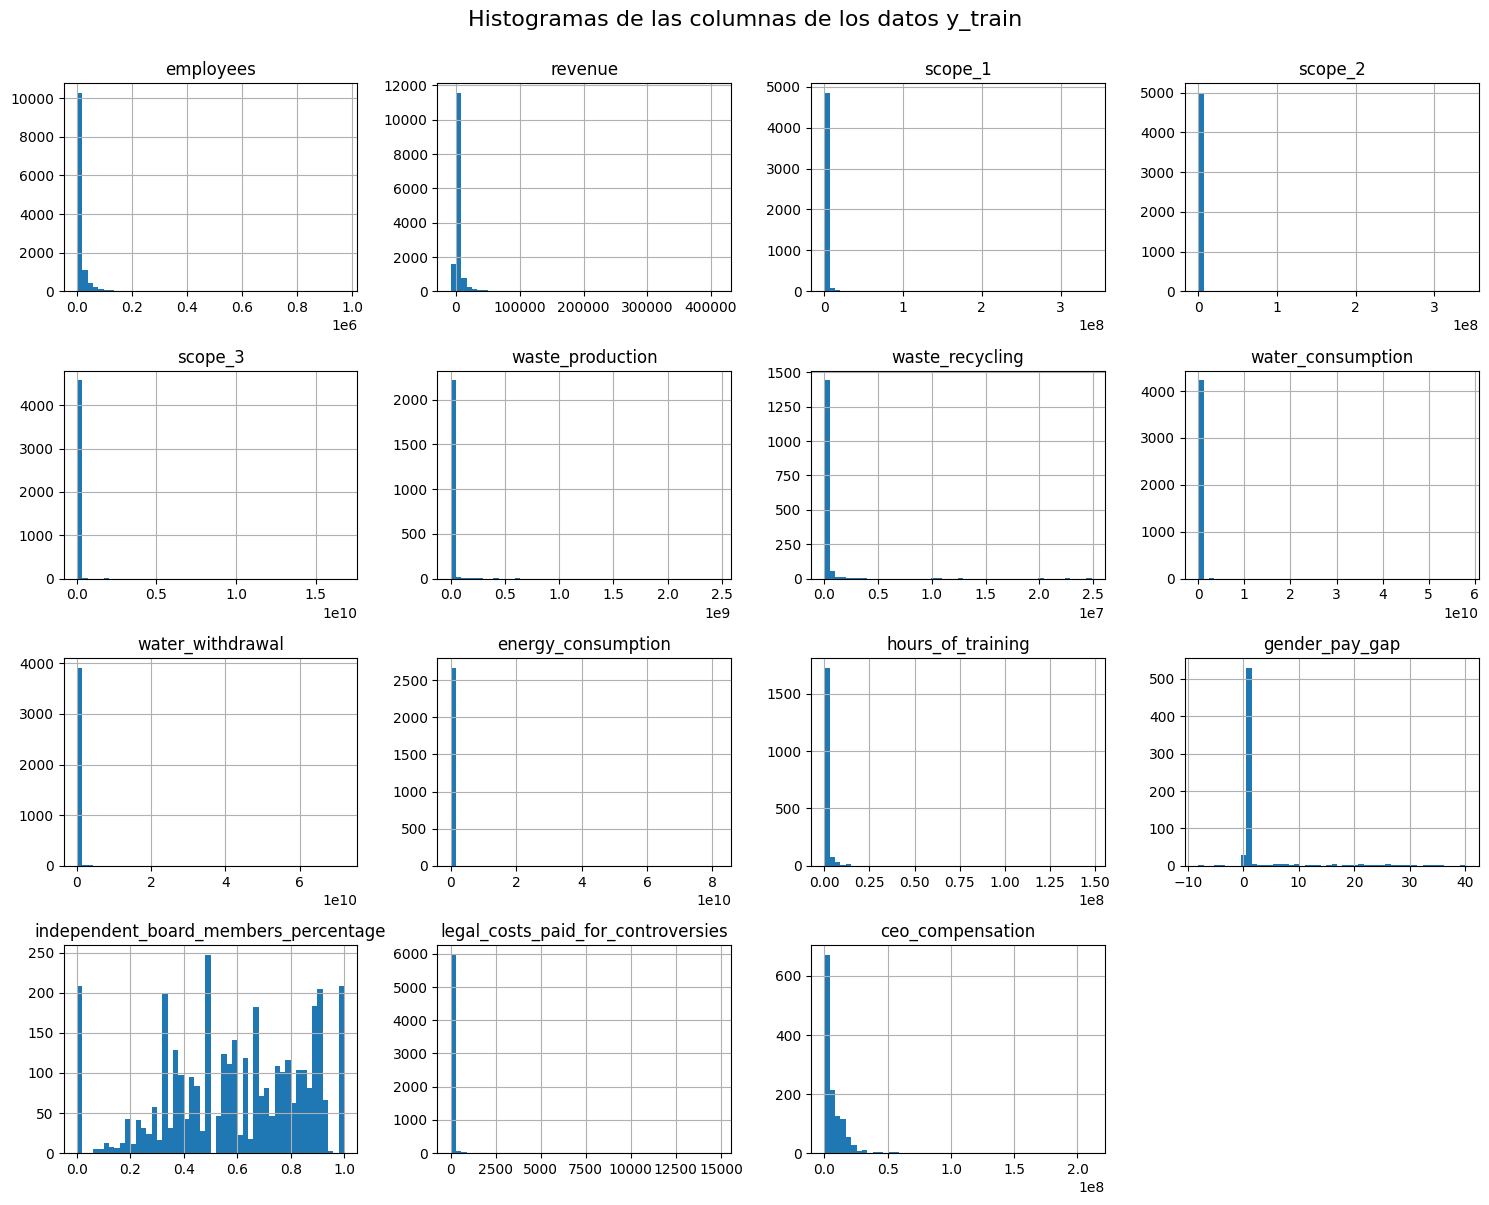

In [30]:
df_y_train[columns].hist(bins=50, figsize=(15, 12), layout=(4, 4))
plt.suptitle("Histogramas de las columnas de los datos y_train", y=1, fontsize=16)
plt.tight_layout()
plt.show()

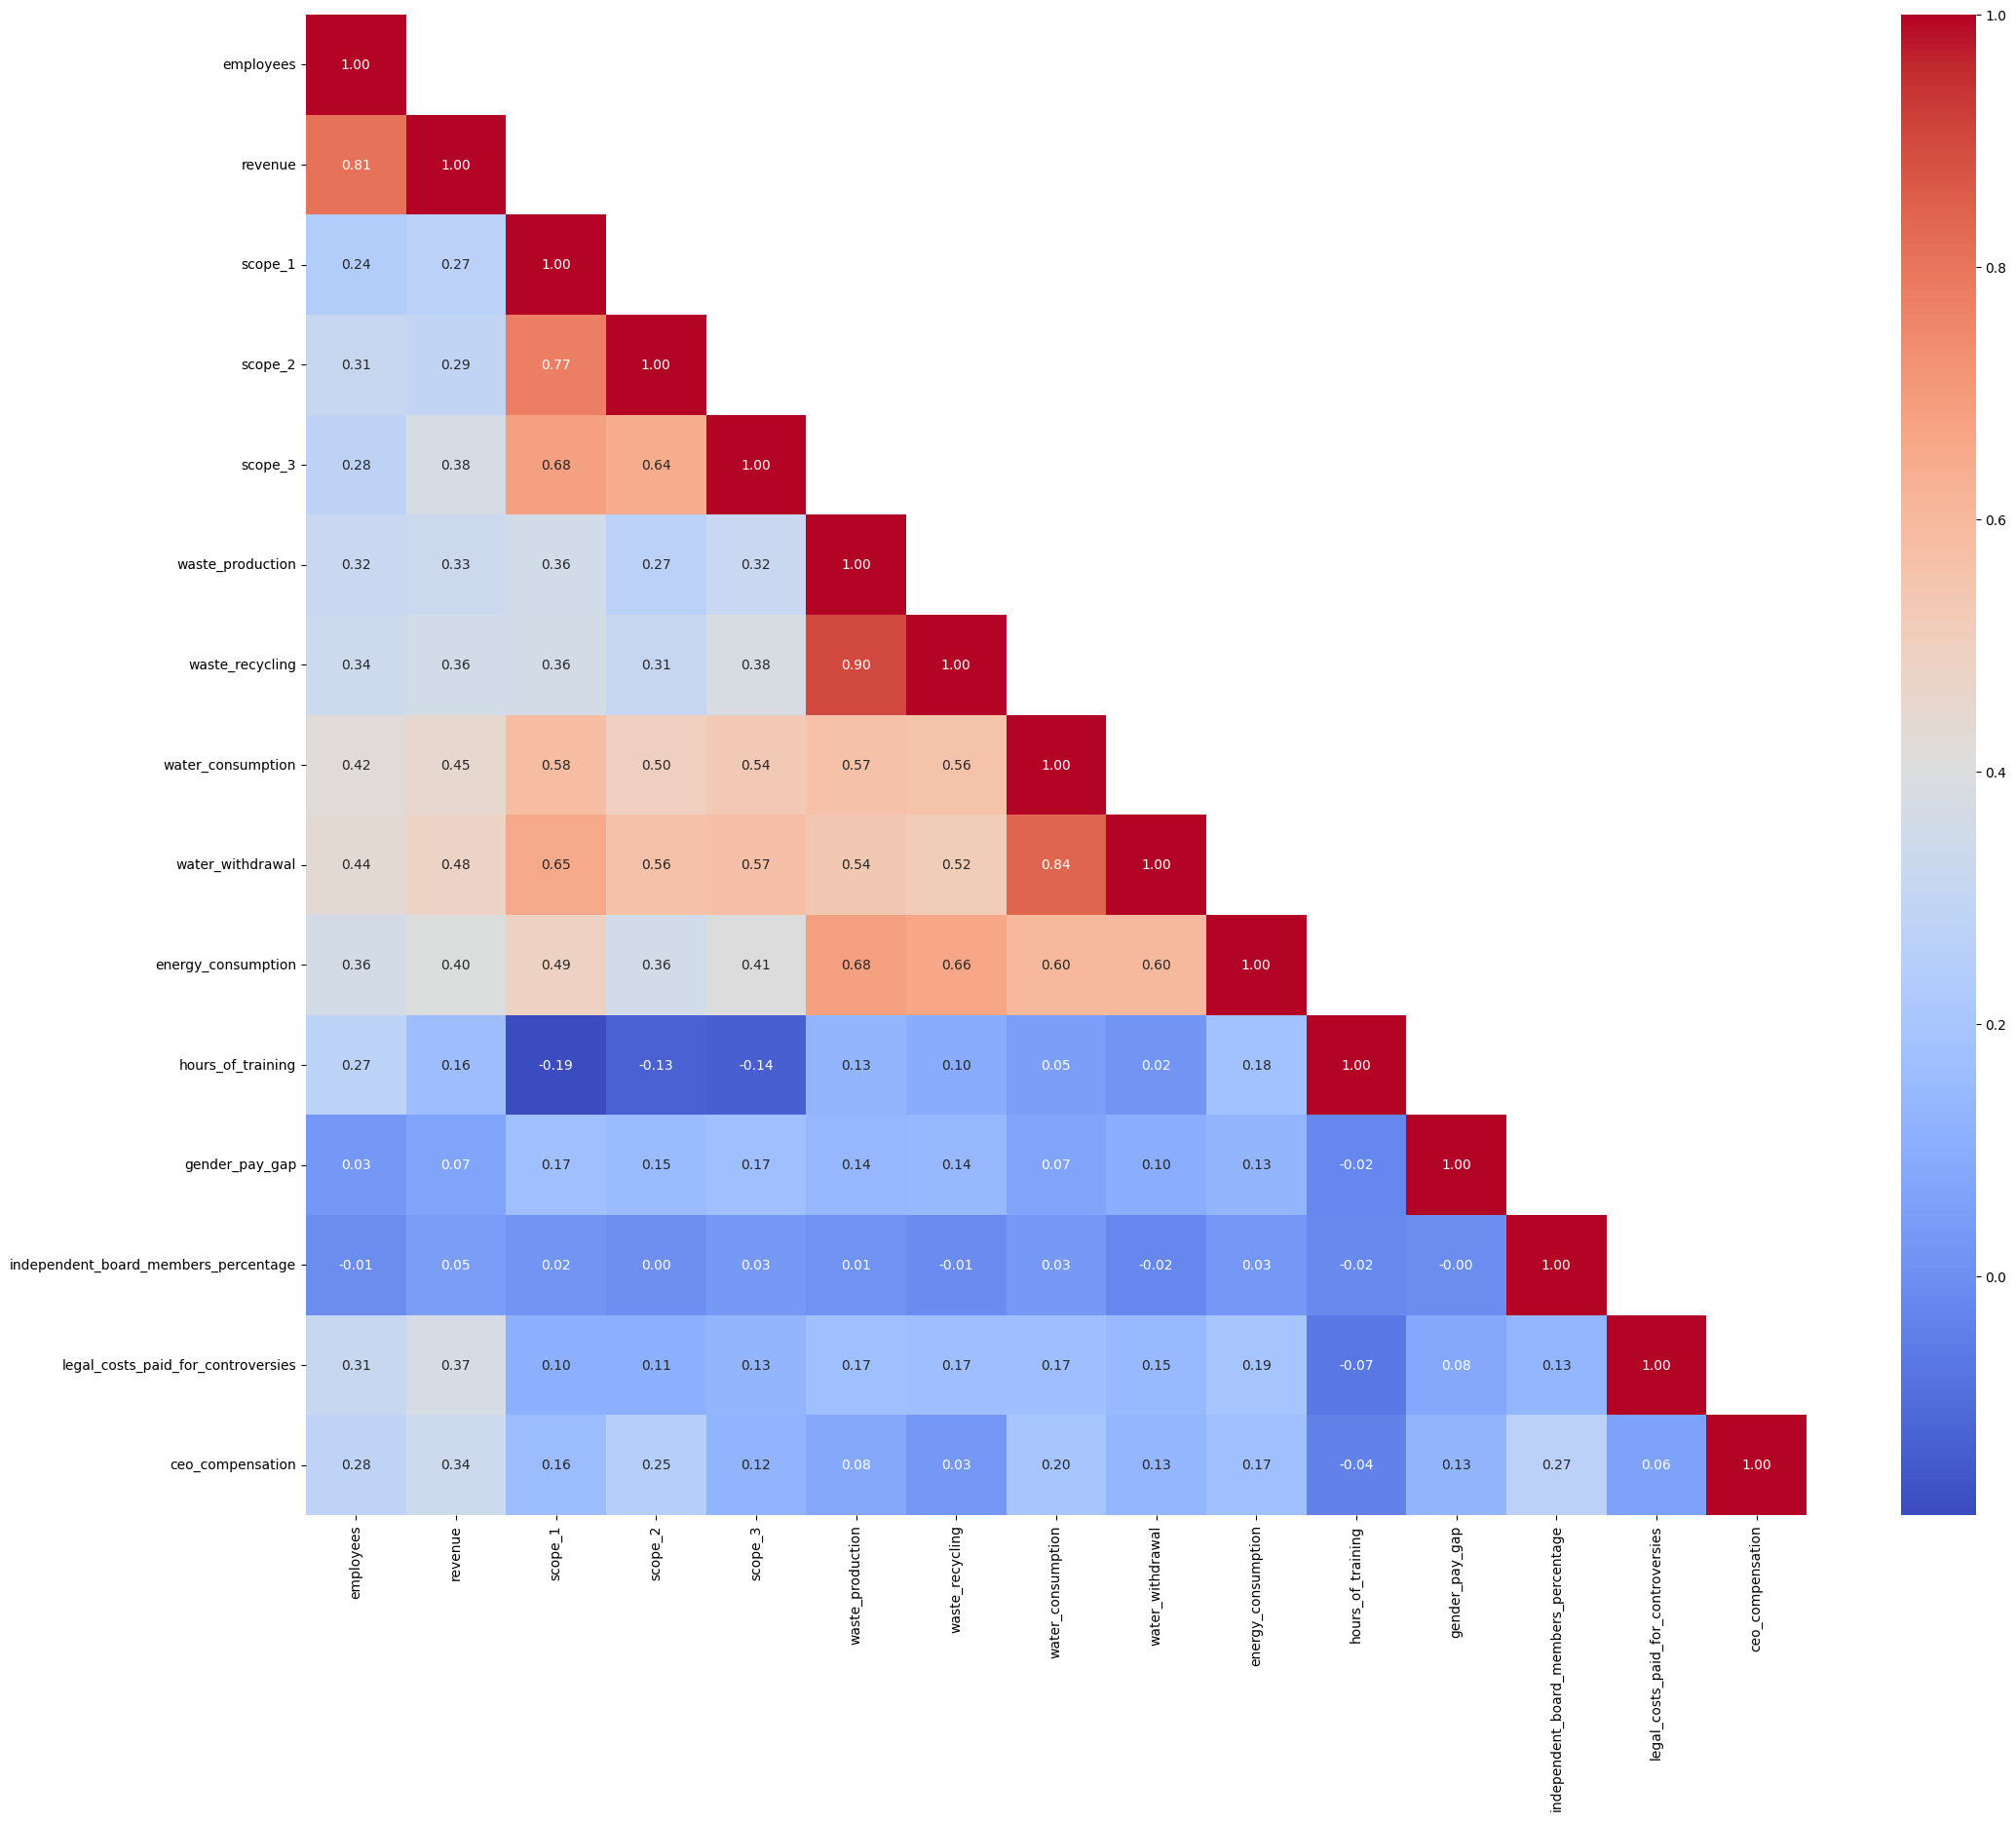

In [31]:
correlation(df_y_train[columns])

Tener en cuenta que la matrix de correlación entre características puede llevarnos a conclusiones erróneas debido a la abultada presencia de valores nulos.

## Preprocesamiento de Datos

In [32]:
columns_to_drop = df_y_train.columns[:7]
columns_to_drop

Index(['anonimized_id', 'company_id', 'year', 'region', 'headquarters_country',
       'industry', 'market_cap'],
      dtype='object')

In [33]:
x_train = df_x_train.drop(columns=columns_to_drop)
y_train = df_y_train.drop(columns=columns_to_drop)

### Imputación de Datos

Vale aquí hacer algunas aclariones:

* Si solamente faltan pocos datos, por ejemplo, menor al 10% podríamos eliminarlos sin perder mucha información y poder entrenar los modelos que veremos a continuación ya que PCA o el gradiente descendente no aceptan valores nulos.

* Si la cantidad de datos faltantes es abundante, ya necesitaríamos algun tipo de inputación de datos en funcion de las distribuciones ya existentes de las características. Por ejemplo si la dispersión de una característica es pequeña (es decir muy cercana al promedio) podríamos reemplazar los datos faltantes con el valores cercanos al mismo promedio (una desviación estandar).

* Existe la posibilidad de aproximar las distribuciones de las características a una distribución en particular, como por ejemplo Gaussiana con el promedio y la desviación estandar de los datos existentes. También se podrían utilizar otras distribuciones parametrizadas. En estos casos es recomendable hacer un test estadístico para verificar que la distribución elegida sea consistente con los datos existentes.

* En nuestro caso, usaremos una estrategia de imputación simple: En los lugares donde falten datos se imputará la mediana, aunque pueden elegirse otras estrategias.

* Tener en cuenta que la imputación de datos puede sesgar a los algoritmos **(IMPORTANTE!)**

* Otra cuestión relevante es el tema de los outliers: si el dato por sí solo es un outlier en la realidad no podrá ser captado ni por PCA, ni por el autoencoder, pero si hay algún tipo de relación entre outliers y diferentes características, los outliers tendrían que poder ser detectados por el autoencoder.


In [34]:
# Imputation
imputer = SimpleImputer(
    strategy="median"
)  # You can choose a different strategy if needed

x_train_imputed = imputer.fit_transform(x_train)
y_train_imputed = imputer.fit_transform(y_train)

### Outliers

In [35]:
aux = pd.DataFrame(y_train_imputed)
z_scores = zscore(aux)
outlier_counts_per_column = {}

# Count outliers for each column
for column in aux.columns:
    outlier_indices = abs(z_scores[column]) > 3
    outlier_count = outlier_indices.sum()
    outlier_counts_per_column[column] = outlier_count

# Display the count of outlier values per column
print("Outliers por columna:")
print(outlier_counts_per_column)

# # Display the values that are considered outliers in each column
# for column in aux.columns:
#     column_outliers = outliers[column].dropna()
#     if not column_outliers.empty:
#         print(f"Outliers in column '{column}': {column_outliers.tolist()}")

Outliers por columna:
{0: np.int64(245), 1: np.int64(217), 2: np.int64(71), 3: np.int64(18), 4: np.int64(10), 5: np.int64(25), 6: np.int64(37), 7: np.int64(8), 8: np.int64(20), 9: np.int64(5), 10: np.int64(58), 11: np.int64(75), 12: np.int64(308), 13: np.int64(75), 14: np.int64(210)}


### Escalado

Aunque el escalado no es imprescindible para el ACP, se recomienda encarecidamente en muchos casos. La razón es que el ACP se basa en la matriz de covarianza de las características, y la escala de éstas puede influir significativamente en los resultados.

He aquí algunos puntos clave a tener en cuenta:

* Impacto de la escala de las características: Las características con escalas más grandes contribuirán más a los componentes principales que las características con escalas más pequeñas. Esto puede dar lugar a una representación sesgada de los datos, en la que las variables con escalas mayores dominen los componentes principales.

* Contribución equitativa de las características: El escalado garantiza que todas las características contribuyan por igual a la matriz de varianza-covarianza, lo que permite al ACP centrarse en las direcciones con la varianza más significativa.

* Interpretabilidad de los componentes principales: Cuando las características están en diferentes escalas, los componentes principales pueden ser difíciles de interpretar, ya que las contribuciones de cada característica no son comparables.

* Estabilidad numérica: El escalado puede mejorar la estabilidad numérica del algoritmo PCA, especialmente si hay grandes diferencias en las magnitudes de las características.

Aunque ACP puede aplicarse técnicamente a datos sin escalar, a menudo se recomienda escalar los datos como una buena práctica. La implementación PCA de Scikit-learn (sklearn.decomposition.PCA) centra automáticamente los datos (restando la media) durante el proceso de ajuste, pero depende del usuario decidir si escalar adicionalmente las características.

Otro detalle importante es ver cuantos **valores negativos** hay en la tabla:

In [36]:
(y_train < 0).sum()

employees                                0
revenue                                 24
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

In [37]:
(y_train < 0).sum()

employees                                0
revenue                                 24
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

Para el dataframe imputado con la mediana:

In [38]:
(pd.DataFrame(y_train_imputed) < 0).sum()

0      0
1     24
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     5
12     0
13     0
14     0
dtype: int64

In [39]:
(pd.DataFrame(y_train_imputed) < 0).sum()

0      0
1     24
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     5
12     0
13     0
14     0
dtype: int64

No se imputan datos negativos demás, pero no deseamos que esos pocos valores negativos hagan un data leak sobre las demas columnas y obtengamos datos sin sentido, por lo tanto, trataremos de evitar esto con el escalado de los datos entre 0 y 1.

## Análisis de componentes principales

Link: https://www.statsmodels.org/stable/generated/statsmodels.multivariate.pca.PCA.html

In [40]:
pca = PCA(y_train_imputed, standardize=True, normalize=True)

In [41]:
# Eigenvalues represent the variance explained by each principal component
eigenvalues = pca.eigenvals

# Total variance is the sum of all eigenvalues
total_variance = sum(eigenvalues)

# Calculate the explained variance ratio for each component
explained_variance_ratio = eigenvalues / total_variance

# Calculate the cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

Cumulative Explained Variance Ratio: [0.14861684 0.25982201 0.35652352 0.43168091 0.50116517 0.56862726
 0.63514882 0.70075558 0.76528505 0.82698595 0.88673125 0.94187833
 0.96430003 0.98318294 1.        ]


In [42]:
print("Cumulative Explained Variance Ratio:", cumulative_explained_variance_ratio)

Cumulative Explained Variance Ratio: [0.14861684 0.25982201 0.35652352 0.43168091 0.50116517 0.56862726
 0.63514882 0.70075558 0.76528505 0.82698595 0.88673125 0.94187833
 0.96430003 0.98318294 1.        ]


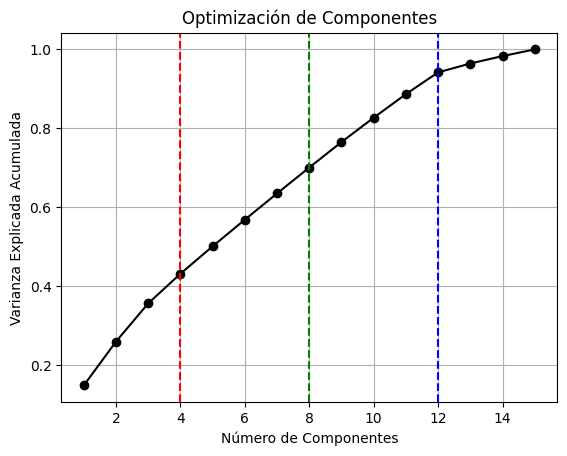

In [43]:
# Plot the cumulative explained variance
plt.plot(
    range(1, len(cumulative_explained_variance_ratio) + 1),
    cumulative_explained_variance_ratio,
    marker="o",
    color="black",
)
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Optimización de Componentes")
plt.grid(True)

# Add vertical dashed lines
plt.axvline(x=4, color="r", linestyle="--", label="Line at 2")
plt.axvline(x=8, color="g", linestyle="--", label="Line at 3")
plt.axvline(x=12, color="b", linestyle="--", label="Line at 4")
plt.show()

Podemos apreciar tres puntos importantes en este gráfico:

* Con **4** componentes principales explicamos más del 40% de la varianza

* Con **8** componentes principales explicamos casi el 70% de la Varianza

* Con **12** componentes principales explicamos cerca del 97% de la Varianza

Tambien la clase cuenta con un método para esto:

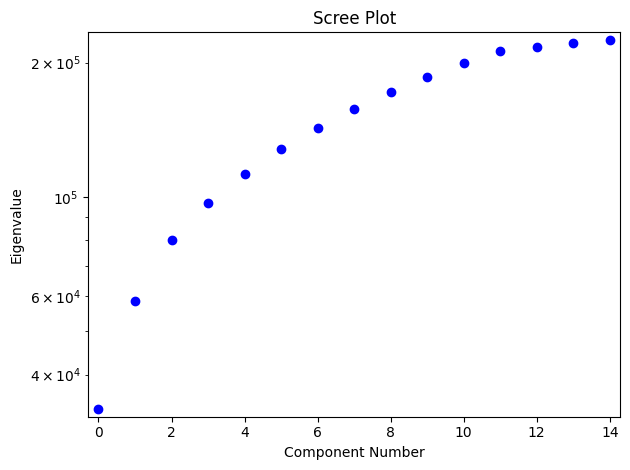

In [44]:
pca.plot_scree(cumulative=True)
plt.show()

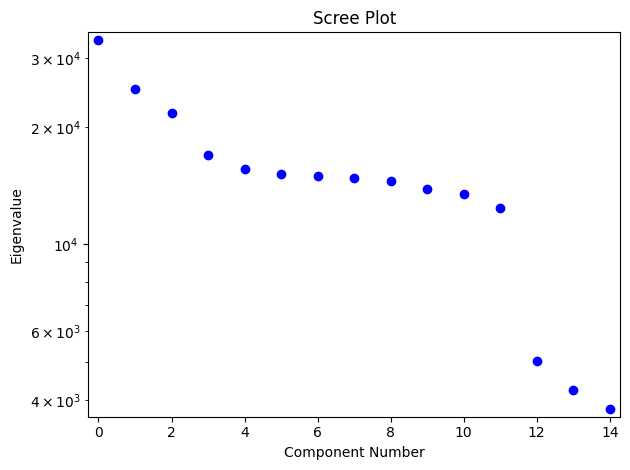

In [45]:
pca.plot_scree()
plt.show()

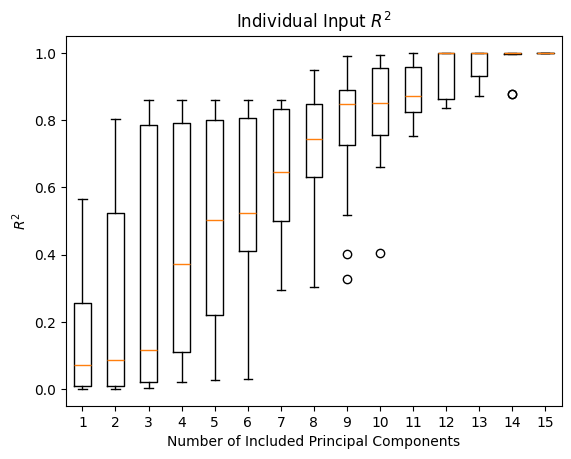

In [46]:
pca.plot_rsquare(15)
plt.show()

El gráfico es un diagrama de caja (boxplot) que muestra la distribución del coeficiente de determinación $R^2$ para un conjunto de datos en función del número de Componentes Principales (PCs) incluidos en el análisis.

Cada caja en el diagrama de caja representa la distribución del $R^2$ para un número específico de componentes principales. La línea naranja dentro de cada caja muestra la mediana del $R^2$, que es el valor central de la distribución.
    
Los extremos de las cajas (los bordes superior e inferior) representan el primer y tercer cuartil de la distribución del $R^2$, lo que significa que el 50% central de los datos se encuentra dentro de la caja.

Las líneas verticales que salen de las cajas, conocidas como "bigotes", se extienden hasta el valor máximo y mínimo dentro de un intervalo definido (a menudo 1.5 veces el rango intercuartílico desde la caja), lo que proporciona una idea de la variabilidad de los datos.

Los círculos que aparecen fuera de los bigotes representan valores atípicos, que son valores del $R^2$ que caen fuera del intervalo de los bigotes y pueden considerarse excepcionales o inusuales en comparación con el resto de los datos.


### Procedimiento

In [47]:
# Choose the optimal number of components based on the plot
optimal_components = 12

In [48]:
pca_model = PCA(data=y_train_imputed, ncomp=optimal_components, standardize=True, normalize=True) # Apply PCA with the optimal number of components

In [49]:
pca_model.factors.shape

(15000, 12)

In [50]:
pca_model.factors.shape

(15000, 12)

In [51]:
pca_model.factors

array([[-0.05295401, -0.01236716, -0.05016911, ..., -0.01723484,
        -0.05746403, -0.01139437],
       [-0.04955997, -0.01122569, -0.04641509, ..., -0.01357722,
        -0.05282578, -0.0137791 ],
       [-0.05074231, -0.01187093, -0.04817057, ..., -0.01789149,
        -0.05678809, -0.00792993],
       ...,
       [ 0.00220022,  0.00044852,  0.00164311, ...,  0.00015467,
         0.00068357,  0.00049213],
       [ 0.0022255 ,  0.00045668,  0.00167613, ...,  0.00016053,
         0.00069788,  0.00051692],
       [ 0.00223363,  0.00045855,  0.00168408, ...,  0.00016142,
         0.00070302,  0.00052406]])

In [52]:
# PCA-transformed data (the principal component scores)
pca_transformed_data = pca_model.factors

In [53]:
# The loading matrix (eigenvectors)
loading_matrix = pca_model.loadings

In [54]:
# Assuming y_train_imputed is the original data used to fit the PCA
data_mean = np.mean(y_train_imputed, axis=0)
data_std = np.std(y_train_imputed, axis=0)

In [55]:
# Inverse transformation
approx_original_data_standardized = np.dot(pca_transformed_data, loading_matrix.T)

In [56]:
# If the data was standardized, you need to unstandardize it (reverse the scaling and centering)
approx_original_data = approx_original_data_standardized * data_std + data_mean

In [57]:
approx_original_data.shape

(15000, 15)

In [58]:
approx_original_data.shape

(15000, 15)

In [59]:
y_train_pca = pd.DataFrame(approx_original_data, columns=y_train.columns) # Convert to Dataframe

In [60]:
y_train_pca.head()

,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
0,16568.101,5295.603,561010.935,168746.849,4547952.684,1035078.439,35456.547,13212141.559,39755394.856,9346813.961,232277.791,1.029,0.606,15.283,4173318.572
1,16439.497,5246.161,561261.445,170221.618,4579921.490,1042548.734,35429.170,13347510.558,40004373.922,9404623.835,233803.793,1.030,0.606,15.362,4147653.787
2,16445.831,5250.865,560734.983,170053.649,4587410.569,1045189.934,35483.071,13200374.822,40039193.147,9367388.987,233443.969,1.029,0.606,15.329,4181636.443
3,15948.313,5082.192,560236.059,167932.270,19839651.512,1081764.578,35135.183,13757689.071,40690059.104,10531593.635,237612.454,1.032,0.610,15.554,4082642.674
4,16817.158,5379.787,565542.588,167801.741,4484527.706,1056991.693,35547.559,13509346.206,38677411.795,10311636.287,226160.432,1.031,0.610,15.474,4078105.640


In [61]:
y_train_pca.head()

,employees,revenue,scope_1,scope_2,scope_3,waste_production,waste_recycling,water_consumption,water_withdrawal,energy_consumption,hours_of_training,gender_pay_gap,independent_board_members_percentage,legal_costs_paid_for_controversies,ceo_compensation
0,16568.101,5295.603,561010.935,168746.849,4547952.684,1035078.439,35456.547,13212141.559,39755394.856,9346813.961,232277.791,1.029,0.606,15.283,4173318.572
1,16439.497,5246.161,561261.445,170221.618,4579921.490,1042548.734,35429.170,13347510.558,40004373.922,9404623.835,233803.793,1.030,0.606,15.362,4147653.787
2,16445.831,5250.865,560734.983,170053.649,4587410.569,1045189.934,35483.071,13200374.822,40039193.147,9367388.987,233443.969,1.029,0.606,15.329,4181636.443
3,15948.313,5082.192,560236.059,167932.270,19839651.512,1081764.578,35135.183,13757689.071,40690059.104,10531593.635,237612.454,1.032,0.610,15.554,4082642.674
4,16817.158,5379.787,565542.588,167801.741,4484527.706,1056991.693,35547.559,13509346.206,38677411.795,10311636.287,226160.432,1.031,0.610,15.474,4078105.640


In [62]:
y_train_filled_pca = y_train.fillna(y_train_pca) # Retaining true data and filling original NaN values

In [63]:
(y_train_filled_pca < 0).sum()

employees                                0
revenue                                 24
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

In [64]:
(y_train_filled_pca < 0).sum()

employees                                0
revenue                                 24
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                           5
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

Hacemos lo mismo para el archivo x_train con la matrix de transformación ya obtenida por el PCA anterior, para después poder comparar la métrica:

In [65]:
x_train_imputed = imputer.fit_transform(x_train)  # Median imputing
new_data_standardized = (x_train_imputed - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
x_train_pca = pd.DataFrame(approx_new_data , columns=x_train.columns)
x_train_filled_pca = x_train.fillna(x_train_pca)

In [66]:
# Initialize an empty list to store NRMSE values for each column
nrmse_values_pca = []

# Iterate over each column with missing values
for column in y_train.columns:
    # Calculate NRMSE for the current column
    nrmse_col = normalized_mrse(y_train_filled_pca, x_train_filled_pca)
    # Append the NRMSE for the current column to the list
    nrmse_values_pca.append(nrmse_col)


# Calculate the final score as the mean of all NRMSE values
score_final = np.mean(nrmse_values_pca)

In [67]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.0019103881055878324


In [68]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.0019103881055878324


### Testing PCA

In [69]:
df_x_test = pd.read_csv("./Data/x_test.csv")

In [70]:
x_test = df_x_test.drop(columns="Unnamed: 0")

In [71]:
x_test = x_test.drop(columns=columns_to_drop)

In [72]:
x_test_imputed = imputer.fit_transform(x_test)  # Median imputing
new_data_standardized = (x_test_imputed - data_mean) / data_std #Std Scaling
new_data_transformed = np.dot(new_data_standardized , loading_matrix) #Transformation
approx_new_data_standardized = np.dot(new_data_transformed, loading_matrix.T) #Inverse Transformation
approx_new_data = approx_original_data_standardized * data_std + data_mean #Unscaling
x_test_pca = pd.DataFrame(approx_new_data , columns=x_test.columns)
x_test_filled_pca = x_test.fillna(x_test_pca)

In [73]:
y_test_pca = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_pca,
    ],
    axis=1,
)

In [74]:
y_test_pca.to_csv("./Data/y_test_pca.csv", index=True)

Your submission score is : **0.20520785012541207**

De acuerdo a la página el benchmarck es 0.2588, asi que estariamos en orden.

In [75]:
(x_test_filled_pca < 0).sum()

employees                                0
revenue                                 15
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       2
hours_of_training                        0
gender_pay_gap                           3
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

In [76]:
(x_test_filled_pca < 0).sum()

employees                                0
revenue                                 15
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       2
hours_of_training                        0
gender_pay_gap                           3
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

Observemos que hay valores negativos que no tienen sentido, aunque son pocos. Chequear siempre que la transformación desde el espacio latente sea consistente en el espacio original.

## Arquitectura Autoencoder

Aunque el aprendizaje profundo ha recibido mucha atención y se ha aplicado a varios problemas de inteligencia artificial en los últimos años, su investigación con fines de imputación sigue siendo un tema poco estudiado. 

Entre los enfoques de aprendizaje profundo para imputación, el Autoencoder (AE) y sus variantes (p. ej. Denoising y Variational) han llamado la atención de la comunidad investigadora debido a sus propiedades en lo que se refiere a la capacidad de de aprender a partir de datos corruptos, lo que constituye una extensión natural al campo de los datos ausentes (Nelwamondo et al., 2007; S'anchez-Morales et al., 2019; Costa et al., 2018; Gondara y Wang, 2018). 

Este tipo de redes neuronales aprenden una representación de los datos a partir de la capa de entrada e intenta reproducirla en la capa de salida. Al hacer esto, el modelo es capaz de aprender a partir de datos incompletos y generar nuevos valores plausibles para la imputación.

In [77]:
BATCH_SIZE = 128  # Adjust this value based on your GPU memory, always try to use powers of 2 (i.e. 2, 4, 8, 16...)

In [78]:
# Convert DataFrame to PyTorch tensor
minmax_scaler_ytrain = MinMaxScaler()
y_train_minmax = minmax_scaler_ytrain.fit_transform(y_train_imputed)
x_train_minmax = minmax_scaler_ytrain.transform(x_train_imputed)
x_train_tensor = torch.tensor(x_train_minmax, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_minmax, dtype=torch.float32)

# Define the ratio for splitting between training and validation sets
validation_ratio = 0.1

# Calculate the size of the validation set
validation_size = int(validation_ratio * len(x_train_tensor))
training_size = len(x_train_tensor) - validation_size

# Use random_split to create training and validation datasets
train_dataset, val_dataset = random_split(
    dataset=TensorDataset(y_train_tensor), lengths=[training_size, validation_size]
)

# Create DataLoaders for training and validation
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False) #Generally do not shuffle validation data

### Linear Autoencoder

In [79]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [80]:
# Set input and hidden size based on your data
input_size = x_train_minmax.shape[1]
hidden_size = int(input_size / 2)

In [81]:
input_size, hidden_size

(15, 7)

In [82]:
input_size, hidden_size

(15, 7)

In [83]:
# Instantiate the model
model_ae = Autoencoder(input_size, hidden_size)
dev = "cuda" if device == "cuda:0" else "cpu"
summary(model_ae.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 7]             112
            Linear-2                  [128, 15]             120
Total params: 232
Trainable params: 232
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.02
Params size (MB): 0.00
Estimated Total Size (MB): 0.03
----------------------------------------------------------------


In [84]:
def train_eval(model, loader, optimizer, loss_func):
    total_loss_train = []
    total_loss_val = []

    # Model in training mode:
    if model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Train", total=len(loader)
        ):
            optimizer.zero_grad(set_to_none=True)

            # Forward pass
            input_data = data[0].to(device)
            output = model(input_data)
            loss_train = loss_func(output, input_data)

            # Check for NaN in loss
            if np.isnan(loss_train.item()):
                print("NaN loss value detected. Aborting training.")
                break

            # Backward pass and optimization
            loss_train.backward()
            optimizer.step()
            total_loss_train.append(loss_train.item())

        return total_loss_train

    # Model in evaluation mode:
    elif not model.training:
        for batch_idx, data in tqdm(
            enumerate(loader), desc="Epoch_Val", total=len(loader)
        ):
            input_data = data[0].to(device)
            outputs = model(input_data)
            loss_val = loss_func(outputs, input_data)
            total_loss_val.append(loss_val.item())
        return total_loss_val


def calc_loss(loss_list, total_loss):
    loss_list.append(sum(total_loss) / len(total_loss))
    return loss_list

In [85]:
# Hiperparámetros
EPOCHS = 100
LR = 0.0001

In [86]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model_ae.parameters(), lr=LR)

In [87]:
# Reset model parameters
def reset_model_parameters(model):
    for layer in model.children():
        if hasattr(layer, "reset_parameters"):
            layer.reset_parameters()

In [88]:
reset_model_parameters(model_ae)

In [89]:
%%time

torch.cuda.empty_cache()

# Lists
loss_list_train = []
loss_list_val = []

# Training and Evaluation
for epoch in range(EPOCHS):
    # Train Iterations
    model = model_ae.train()
    total_loss_train = train_eval(model_ae, train_loader, optimizer, loss)

    # Val Iterations
    model = model.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model_ae, val_loader, optimizer, loss)

    # Calc Loss
    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)

    # Printing Metrics per Epoch
    print(
        f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n"
    )

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.1169  Val Loss:0.1080



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.1003  Val Loss:0.0927



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.0861  Val Loss:0.0795



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.0737  Val Loss:0.0680



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.0628  Val Loss:0.0578



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.0532  Val Loss:0.0487



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.0446  Val Loss:0.0407



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.0370  Val Loss:0.0335



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.0303  Val Loss:0.0272



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.0244  Val Loss:0.0218



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.0193  Val Loss:0.0171



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.0151  Val Loss:0.0132



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.0115  Val Loss:0.0101



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.0087  Val Loss:0.0076



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.0065  Val Loss:0.0056



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.0048  Val Loss:0.0042



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.0036  Val Loss:0.0032



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.0028  Val Loss:0.0025



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.0022  Val Loss:0.0020



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.0018  Val Loss:0.0017



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.0015  Val Loss:0.0015



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.0014  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.0012  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0009  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0009  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0009  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0003  Val Loss:0.0003



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0003  Val Loss:0.0003

CPU times: user 23 s, sys: 333 ms, total: 23.3 s
Wall time: 23.6 s


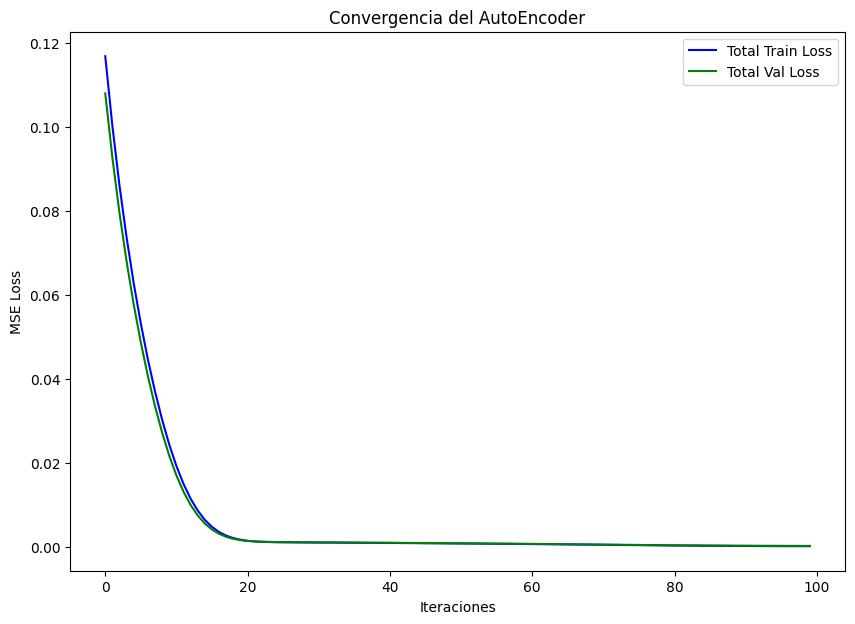

In [90]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [91]:
# Use the trained Autoencoder to fill missing values
model_ae.eval()
with torch.no_grad():
    filled_data_y = model_ae(y_train_tensor.to(device))
    filled_data_x = model_ae(x_train_tensor.to(device))

filled_data_y = minmax_scaler_ytrain.inverse_transform(filled_data_y.cpu().numpy())
filled_data_x = minmax_scaler_ytrain.inverse_transform(filled_data_x.cpu().numpy())

y_train_ae = pd.DataFrame(filled_data_y, columns=y_train.columns)
y_train_filled_ae = y_train.fillna(y_train_ae)
x_train_ae = pd.DataFrame(filled_data_x, columns=x_train.columns)
x_train_filled_ae = x_train.fillna(x_train_ae)

In [92]:
nrmse_values_ae = []

for column in y_train.columns:
    mrmse_col = normalized_mrse(y_train_filled_ae[column], x_train_filled_ae[column])
    nrmse_values_ae.append(nrmse_col)

score_final = np.mean(nrmse_values_ae)

In [93]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.0019103881055878324


In [94]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.0019103881055878324


#### Testing LAE

In [95]:
# Convert DataFrame to PyTorch tensor
x_test_minmax = minmax_scaler_ytrain.transform(x_test_imputed)
x_test_tensor = torch.tensor(x_test_minmax, dtype=torch.float32)

In [96]:
# Use the trained Autoencoder to fill missing values
model_ae.eval()
with torch.no_grad():
    filled_data = model_ae(x_test_tensor.to(device))

filled_data = minmax_scaler_ytrain.inverse_transform(filled_data.cpu().numpy())

x_test_ae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_filled_ae = x_test.fillna(x_test_ae)
y_test_ae = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_ae,
    ],
    axis=1,
)

In [97]:
y_test_ae.to_csv("./Data/y_test_ae.csv", index=True)

In [98]:
(x_test_filled_ae < 0).sum()

employees                                 117
revenue                                    15
scope_1                                  9232
scope_2                                  9243
scope_3                                  1144
waste_production                        10292
waste_recycling                          6585
water_consumption                        1542
water_withdrawal                         8852
energy_consumption                      10894
hours_of_training                        5931
gender_pay_gap                             17
independent_board_members_percentage        0
legal_costs_paid_for_controversies       7591
ceo_compensation                            1
dtype: int64

In [99]:
(x_test_filled_ae < 0).sum()

employees                                 117
revenue                                    15
scope_1                                  9232
scope_2                                  9243
scope_3                                  1144
waste_production                        10292
waste_recycling                          6585
water_consumption                        1542
water_withdrawal                         8852
energy_consumption                      10894
hours_of_training                        5931
gender_pay_gap                             17
independent_board_members_percentage        0
legal_costs_paid_for_controversies       7591
ceo_compensation                            1
dtype: int64

### Non Linear Autoencoder

In [100]:
# Define the Autoencoder model
class Non_Linear_Autoencoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Non_Linear_Autoencoder, self).__init__()
        self.encoder = nn.Sequential(nn.Linear(input_size, hidden_size), nn.ReLU())
        self.decoder = nn.Sequential(nn.Linear(hidden_size, input_size), nn.ReLU())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [101]:
model_nlae = Non_Linear_Autoencoder(input_size, hidden_size)
summary(model_nlae.to(device), (input_size,), batch_size=BATCH_SIZE, device=dev)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [128, 7]             112
              ReLU-2                   [128, 7]               0
            Linear-3                  [128, 15]             120
              ReLU-4                  [128, 15]               0
Total params: 232
Trainable params: 232
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.04
Params size (MB): 0.00
Estimated Total Size (MB): 0.05
----------------------------------------------------------------


In [102]:
reset_model_parameters(model_nlae)

In [103]:
loss = nn.MSELoss().to(device)
optimizer = optim.Adam(model_nlae.parameters(), lr=LR)

In [104]:
%%time

torch.cuda.empty_cache()

loss_list_train = []
loss_list_val = []

for epoch in range(EPOCHS):

    model = model_nlae.train()
    total_loss_train = train_eval(model_nlae, train_loader, optimizer, loss)

    model = model_nlae.eval()
    with torch.no_grad():
        total_loss_val = train_eval(model_nlae, val_loader, optimizer, loss)

    loss_list_train = calc_loss(loss_list_train, total_loss_train)
    loss_list_val = calc_loss(loss_list_val, total_loss_val)
    print(
        f"Training [{100.0 *(epoch+1)/EPOCHS:.0f}%]\t\tTrain Loss:{loss_list_train[-1]:.4f}  Val Loss:{loss_list_val[-1]:.4f}\n"
    )

Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [1%]		Train Loss:0.0243  Val Loss:0.0228



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [2%]		Train Loss:0.0214  Val Loss:0.0198



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [3%]		Train Loss:0.0184  Val Loss:0.0169



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [4%]		Train Loss:0.0155  Val Loss:0.0142



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [5%]		Train Loss:0.0130  Val Loss:0.0118



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [6%]		Train Loss:0.0107  Val Loss:0.0096



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [7%]		Train Loss:0.0087  Val Loss:0.0077



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [8%]		Train Loss:0.0070  Val Loss:0.0062



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [9%]		Train Loss:0.0056  Val Loss:0.0049



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [10%]		Train Loss:0.0044  Val Loss:0.0039



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [11%]		Train Loss:0.0035  Val Loss:0.0031



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [12%]		Train Loss:0.0028  Val Loss:0.0025



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [13%]		Train Loss:0.0023  Val Loss:0.0021



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [14%]		Train Loss:0.0019  Val Loss:0.0018



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [15%]		Train Loss:0.0017  Val Loss:0.0016



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [16%]		Train Loss:0.0015  Val Loss:0.0014



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [17%]		Train Loss:0.0014  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [18%]		Train Loss:0.0013  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [19%]		Train Loss:0.0012  Val Loss:0.0013



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [20%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [21%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [22%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [23%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [24%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [25%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [26%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [27%]		Train Loss:0.0012  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [28%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [29%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [30%]		Train Loss:0.0011  Val Loss:0.0012



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [31%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [32%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [33%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [34%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [35%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [36%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [37%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [38%]		Train Loss:0.0011  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [39%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [40%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [41%]		Train Loss:0.0010  Val Loss:0.0011



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [42%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [43%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [44%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [45%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [46%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [47%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [48%]		Train Loss:0.0010  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [49%]		Train Loss:0.0009  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [50%]		Train Loss:0.0009  Val Loss:0.0010



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [51%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [52%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [53%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [54%]		Train Loss:0.0009  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [55%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [56%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [57%]		Train Loss:0.0008  Val Loss:0.0009



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [58%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [59%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [60%]		Train Loss:0.0008  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [61%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [62%]		Train Loss:0.0007  Val Loss:0.0008



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [63%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [64%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [65%]		Train Loss:0.0007  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [66%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [67%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [68%]		Train Loss:0.0006  Val Loss:0.0007



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [69%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [70%]		Train Loss:0.0006  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [71%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [72%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [73%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [74%]		Train Loss:0.0005  Val Loss:0.0006



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [75%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [76%]		Train Loss:0.0005  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [77%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [78%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [79%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [80%]		Train Loss:0.0004  Val Loss:0.0005



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [81%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [82%]		Train Loss:0.0004  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [83%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [84%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [85%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [86%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [87%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [88%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [89%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [90%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [91%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [92%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [93%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [94%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [95%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [96%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [97%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [98%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [99%]		Train Loss:0.0003  Val Loss:0.0004



Epoch_Train:   0%|          | 0/106 [00:00<?, ?it/s]

Epoch_Val:   0%|          | 0/12 [00:00<?, ?it/s]

Training [100%]		Train Loss:0.0003  Val Loss:0.0004

CPU times: user 26.3 s, sys: 336 ms, total: 26.7 s
Wall time: 27 s


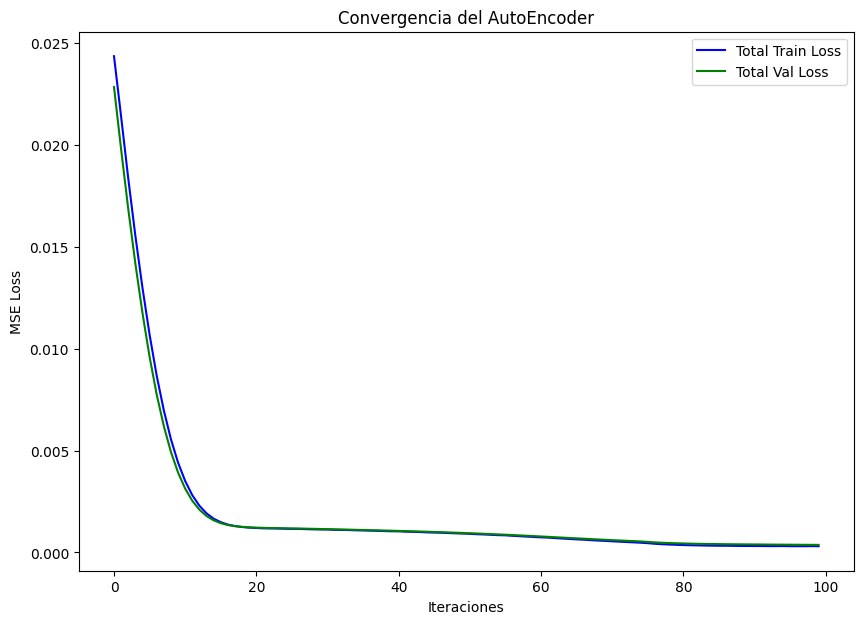

In [105]:
fig, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(loss_list_train, "b", label="Total Train Loss")
ax1.plot(loss_list_val, "g", label="Total Val Loss")
plt.title("Convergencia del AutoEncoder", color="black")
ax1.set_xlabel("Iteraciones")
ax1.set_ylabel("MSE Loss", color="black")
ax1.legend(loc="upper right")
plt.show()

In [106]:
model_nlae.eval()
with torch.no_grad():
    filled_data_y = model_nlae(y_train_tensor.to(device))
    filled_data_x = model_nlae(x_train_tensor.to(device))

In [107]:
filled_data_y = minmax_scaler_ytrain.inverse_transform(filled_data_y.cpu().numpy())
filled_data_x = minmax_scaler_ytrain.inverse_transform(filled_data_x.cpu().numpy())
y_train_nlae = pd.DataFrame(filled_data_y, columns=y_train.columns)
y_train_filled_nlae = y_train.fillna(y_train_nlae)
x_train_nlae = pd.DataFrame(filled_data_x, columns=x_train.columns)
x_train_filled_nlae = x_train.fillna(x_train_nlae)

In [108]:
nrmse_values_nlae = []

for column in y_train.columns:
    nrmse_col = normalized_mrse(
        y_train_filled_nlae[column], x_train_filled_nlae[column]
    )
    nrmse_values_nlae.append(nrmse_col)

score_final = np.mean(nrmse_values_nlae)

In [109]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.009890110703056398


In [110]:
print(f"Final NRMSE Score in training: {score_final}")

Final NRMSE Score in training: 0.009890110703056398


#### Testing NLAE

In [111]:
# Testing
model_nlae.eval()
with torch.no_grad():
    filled_data = model_nlae(x_test_tensor.to(device))

filled_data = minmax_scaler_ytrain.inverse_transform(filled_data.cpu().numpy())
x_test_nlae = pd.DataFrame(filled_data, columns=x_test.columns)
x_test_filled_nlae = x_test.fillna(x_test_nlae)
y_test_nlae = pd.concat(
    [
        df_x_test[
            [
                "anonimized_id",
                "company_id",
                "year",
                "region",
                "headquarters_country",
                "industry",
                "market_cap"
            ]
        ],
        x_test_filled_nlae,
    ],
    axis=1,
)

In [112]:
y_test_nlae.to_csv("./Data/y_test_nae.csv", index=True)

Score from webpage:

In [113]:
(x_test_filled_nlae < 0).sum()

employees                                0
revenue                                 21
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                          37
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

In [114]:
(x_test_filled_nlae < 0).sum()

employees                                0
revenue                                 21
scope_1                                  0
scope_2                                  0
scope_3                                  0
waste_production                         0
waste_recycling                          0
water_consumption                        0
water_withdrawal                         0
energy_consumption                       0
hours_of_training                        0
gender_pay_gap                          37
independent_board_members_percentage     0
legal_costs_paid_for_controversies       0
ceo_compensation                         0
dtype: int64

Your submission score is : **0.4434207181582074**

In [115]:
print("Valores negativos para PCA, LAE y NLAE:")
print(
    f"{(x_test_filled_pca<0).sum().sum()}, {(x_test_filled_ae<0).sum().sum()}, {(x_test_filled_nlae<0).sum().sum()}"
)

Valores negativos para PCA, LAE y NLAE:
20, 71456, 58


In [116]:
print("Valores negativos para PCA, LAE y NLAE:")
print(
    f"{(x_test_filled_pca<0).sum().sum()}, {(x_test_filled_ae<0).sum().sum()}, {(x_test_filled_nlae<0).sum().sum()}"
)

Valores negativos para PCA, LAE y NLAE:
20, 71456, 58


Ejercicio:

* Es posible mejorar la capacidad de predicción con un nuevo autoencoder?

![Lenguaje Matemático](./Images/Matematicas.png)

![Contacto](./Images/Contacto.png)